<a href="https://colab.research.google.com/github/abrarfayez/Machine-Learning/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import os
import scipy.linalg as la
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import threading
import time

2. Generate the Data Matrix and the Label vector.

In [ ]:
def Compute_DataMatrix_and_Label():
    Data_Matrix = np.zeros((400, 10304))
    labels = np.zeros((400, 1))
    counter = 0
    j = 1
    file_name = '/content/drive/MyDrive/IMAGES'
    folders = os.listdir(file_name)  # each folder for a person s1, s2, s3....etc
    for image in folders:
        images = os.listdir(file_name + "/" + image)  # get list of images for every person
        for i in images:
            im = cv2.imread(file_name + "/" + image + "/" + i, 0)  # read image
            array1 = np.asarray(im)
            Data_Matrix[counter, :] = array1.reshape(-1)  # convert image to a vector
            labels[counter] = j  # generate label matrix
            counter += 1
        j += 1

    return Data_Matrix, labels

3. Split the Dataset into Training and Test sets 

In [ ]:
def split(data, labels):
    x_test = np.zeros((200, 10304))
    y_test = np.zeros((200, 1))
    x_train = np.zeros((200, 10304))
    y_train = np.zeros((200, 1))
    test_count = 0
    train_count = 0
    for i in range(0, len(data)):
        if i % 2 == 0:  # if even row then test
            x_test[test_count, :] = data[i]
            y_test[test_count, :] = labels[i]
            test_count += 1
        else:  # odd row then train
            x_train[train_count, :] = data[i]
            y_train[train_count, :] = labels[i]
            train_count += 1

    return x_train, x_test, y_train, y_test

In [ ]:
def sort_Eigenvector(Eigen_values, Eigen_vectors):
  swapped = True
  while swapped:
        swapped = False
        for i in range(len(Eigen_values) - 1):
            if Eigen_values[i] < Eigen_values[i + 1]:
                # Swap the elements
                Eigen_values[i], Eigen_values[i + 1] = Eigen_values[i + 1], Eigen_values[i]
                Eigen_vectors[i], Eigen_vectors[i + 1] = Eigen_vectors[i + 1], Eigen_vectors[i]
                swapped = True
  return Eigen_values, Eigen_vectors

In [ ]:
def check_alpha(alpha, variance, iteration_no):
  sum = 0
  count = 0
  for i in variance:
    count += 1
    if sum >= alpha[iteration_no]:
      break
    else:
      sum += i
  return count

4.b. Project the training set and test sets separately using the same projection matrix.

In [ ]:
def reduce_dimensionality(x_train, x_test, reduced_U):
    reduced_x_train = np.zeros((x_train.shape[0], len(reduced_U))) 
    reduced_x_test = np.zeros((x_test.shape[0], len(reduced_U))) 
    
    i=0
    for image in x_train:
        reduced_x_train[i,:]=np.dot(image,reduced_U.T)
        i+=1
    i=0
    for image in x_test:
        reduced_x_test[i,:] = np.dot(image,reduced_U.T)
        i+=1
        
    return reduced_x_train, reduced_x_test

4. c) Use a simple classifier
 and d) Report Accuracy for every value of alpha separately.

In [ ]:
def apply_classifier(k, reduced_x_train, y_train, reduced_x_test, y_test):
  accuracy = []
  # applying knn classifier
  for neighbor in k:
     knn = KNeighborsClassifier(n_neighbors=neighbor)
     knn.fit(reduced_x_train, y_train)
     predicted_x_test = knn.predict(reduced_x_test)   # predict labels 
     accuracy.append(accuracy_score(y_test, predicted_x_test))  # calculate accuracy
  return accuracy



4. 
a) Applying pseudo code.

In [ ]:
def PCA(Data, alpha):
    mean = Data.mean(axis=0)  # mean of each column
    z = Data - mean.transpose() # center the data
    cov_matrix = (np.matmul(z.T, z)) * (1/200) # compute covariance matrix
    Eigen_values, Eigen_vectors = la.eig(cov_matrix)  # get eigen values and vectors
    total_eigenvalues = sum(Eigen_values)
    Eigen_values, Eigen_vectors = sort_Eigenvector(Eigen_values, Eigen_vectors)
    Explained_variance = [(i/total_eigenvalues) for i in Eigen_values]
    components_no =[check_alpha(alpha, Explained_variance, i) for i in range(0, len(alpha))]
    return components_no, Eigen_vectors
   

6. Classifier Tuning. 

In [ ]:
def plotting(x_train,x_test,y_train,y_test):
    ALPHA = [0.8, 0.85, 0.9, 0.95]
    components_no, Eigen_vectors = PCA(x_train, ALPHA)
    print('component no = ', components_no)
    k = [1, 3, 5, 7]
    q = 0.8
     # reducing dimentionality
    for iterr in range(0, 4):
      reduced_U = Eigen_vectors[0:components_no [iterr]]  # reduced projection matrix
      reduced_x_train, reduced_x_test = reduce_dimensionality(x_train, x_test, reduced_U)
      accuracy = apply_classifier(k, reduced_x_train, y_train, reduced_x_test, y_test)
      print('accuracy = ', accuracy , ' at alpha = ' + str(ALPHA[iterr]))
      plt.figure()
      plt.plot(k, accuracy)
      plt.title('Accuracy in '+  threading.currentThread().getName() + ' at alpha = '+ str(ALPHA[iterr]))
      plt.xlabel('K_values')
      plt.ylabel('Accuracy')

In [ ]:
def operateDefault(Data_Matrix, Label):
    x_train, x_test, y_train, y_test = split(data=Data_Matrix, labels=Label)
    print(threading.currentThread().getName() + ' started ')
    plotting(x_train, x_test, y_train, y_test)

# Link the drive


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bonus


In [ ]:
def bonusSplit(data,labels):
  # create training and testing vars
    x_test = np.zeros((120, 10304))
    y_test = np.zeros((120, 1))
    x_train = np.zeros((280, 10304))
    y_train = np.zeros((280, 1))
    length=int(len(data)/10)
    pos = 0
    test_pos = 0

    for i in range(0,length): #loop on the 400 image
        X_train, X_test, Y_train, Y_test = train_test_split(data[(i*10):(i*10+10)], labels[(i*10):(i*10+10)], test_size=0.3) # split each subject to 70/30
        j = 0
        for count in range(pos, pos+7):
          x_train[count,:] = X_train[j]
          y_train[count,:] = Y_train[j]
          j += 1
        pos += 7
        j=0
        for count in range(test_pos, test_pos+3):
          x_test[count,:] = X_test[j]
          y_test[count,:] = Y_test[j]
          j += 1
        test_pos += 3

    return x_train, x_test, y_train, y_test


Compare results of bonus operation



In [ ]:
def operateBonus(Data_Matrix, Label):
    X_train, X_test, y_train, y_test=bonusSplit(Data_Matrix,Label)
    print(threading.currentThread().getName() + ' started ')
    plotting(X_train, X_test, y_train, y_test)

Main program


bonus_split started 
default_split started 
component no =  [37, 53, 77, 117]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

accuracy =  [0.765, 0.69, 0.68, 0.655]  at alpha = 0.8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.85, 0.745, 0.72, 0.675]  at alpha = 0.85


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.91, 0.78, 0.765, 0.715]  at alpha = 0.9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.905, 0.77, 0.75, 0.68]  at alpha = 0.95
component no =  [40, 60, 92, 148]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

accuracy =  [0.7833333333333333, 0.725, 0.6916666666666667, 0.675]  at alpha = 0.8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.9416666666666667, 0.8583333333333333, 0.7916666666666666, 0.7666666666666667]  at alpha = 0.85


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.9416666666666667, 0.8833333333333333, 0.8333333333333334, 0.8166666666666667]  at alpha = 0.9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

accuracy =  [0.925, 0.8583333333333333, 0.8416666666666667, 0.8166666666666667]  at alpha = 0.95


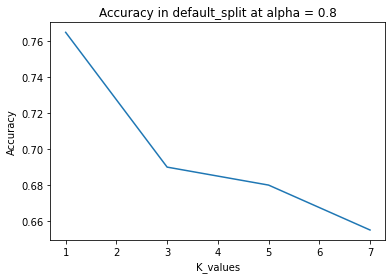

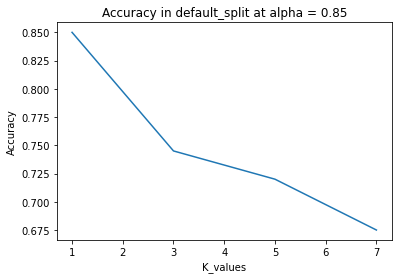

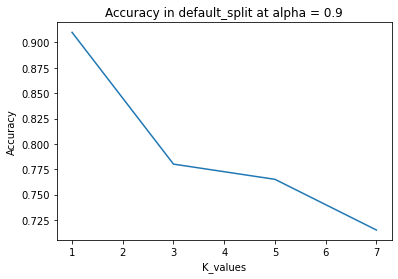

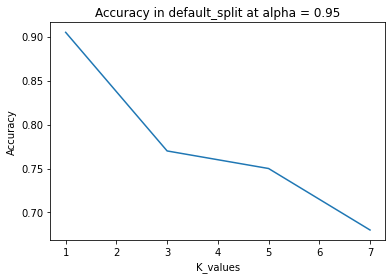

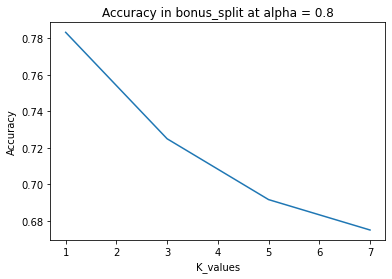

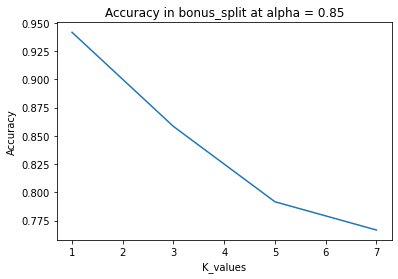

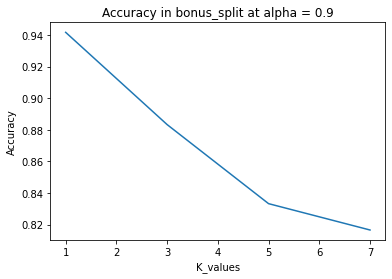

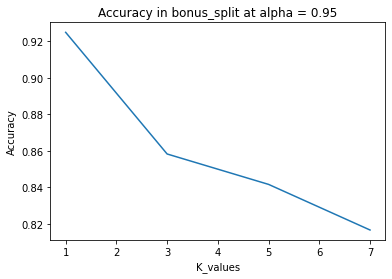

In [ ]:
def main():
    Data_Matrix, Label = Compute_DataMatrix_and_Label()
    thread1= threading.Thread(name='bonus_split', target=operateBonus, args=(Data_Matrix, Label)) #create a thread for bonus to save time
    thread2= threading.Thread(name='default_split', target=operateDefault, args=(Data_Matrix, Label)) 
    thread1.start()
    time.sleep(2)
    thread2.start()
    thread1.join()
    thread2.join()

if __name__ == "__main__":
    main()
